In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df = df.drop(['Radio','Newspaper'],axis=1)

In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()


,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [8]:
X = df['TV'].values
y = df['Sales'].values

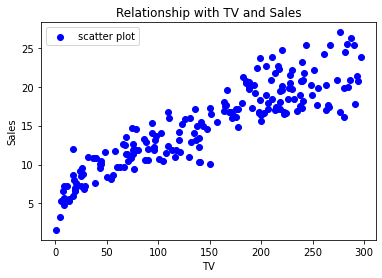

In [9]:
plt.scatter(X,y,color='b',label='scatter plot')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Relationship with TV and Sales')
plt.legend(loc=2)
plt.show()

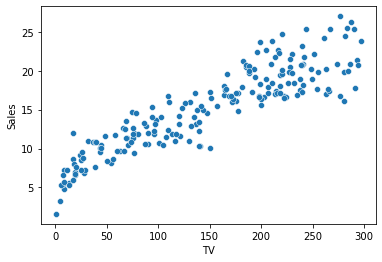

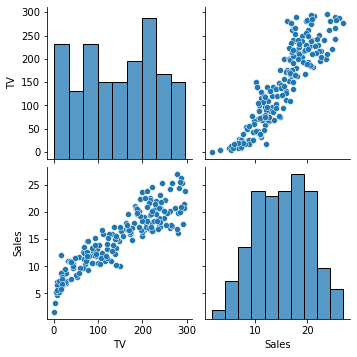

In [10]:
sns.scatterplot(data=df,x='TV',y='Sales')
# plot a pairplot also for df
sns.pairplot(df)

In [11]:
print(X.shape)
print(y.shape)

(200,)
(200,)


In [12]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [13]:
X.shape

(200, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 1)
(150, 1)
(50, 1)
(50, 1)


In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
y_pred

array([[ 7.98025892],
       [13.70535458],
       [18.97686778],
       [22.92082257],
       [12.28929227],
       [12.18972539],
       [14.80059027],
       [12.21738286],
       [ 8.21258165],
       [15.92901492],
       [17.46677009],
       [10.64643874],
       [20.17720185],
       [10.19285628],
       [17.58293145],
       [17.1238175 ],
       [20.02785152],
       [13.84917341],
       [17.94801001],
       [16.21112109],
       [18.88836389],
       [ 8.37852645],
       [20.34867814],
       [19.09302914],
       [13.56153575],
       [14.42998021],
       [11.12214717],
       [22.58340147],
       [14.18106301],
       [ 7.62071185],
       [12.10675299],
       [22.39533069],
       [ 9.28015987],
       [17.94801001],
       [18.86623791],
       [20.6363158 ],
       [16.37153439],
       [19.73468237],
       [13.14114226],
       [16.99659315],
       [15.99539284],
       [15.2762987 ],
       [19.59086355],
       [22.62212192],
       [20.65844177],
       [18

In [17]:
a = lm.coef_
b = lm.intercept_
print(a)
print(b)

[[0.05531493]]
[6.89608622]


In [18]:
#making the prediction 
# to make single prediction lm.predict(xi) xi = single value of tv
#Predicting Sales values on first five 5 TV  datasets only
lm.predict(X)[0:5]

array([[19.62405251],
       [ 9.35760078],
       [ 7.84750308],
       [15.2762987 ],
       [16.89702627]])

In [19]:
lm.predict(X)

array([[19.62405251],
       [ 9.35760078],
       [ 7.84750308],
       [15.2762987 ],
       [16.89702627],
       [ 7.37732614],
       [10.07669492],
       [13.54494127],
       [ 7.37179465],
       [17.94801001],
       [10.55240335],
       [18.77220253],
       [ 8.21258165],
       [12.28929227],
       [18.18586423],
       [17.7046243 ],
       [10.64643874],
       [22.46170862],
       [10.72387964],
       [15.04397598],
       [18.97686778],
       [20.02785152],
       [ 7.62624335],
       [19.52448563],
       [10.3422066 ],
       [21.43838234],
       [14.80059027],
       [20.17720185],
       [20.65844177],
       [10.80132055],
       [23.09783036],
       [13.14114226],
       [12.27269779],
       [21.58773266],
       [12.18972539],
       [22.9761375 ],
       [21.65964207],
       [11.02811178],
       [ 9.28015987],
       [19.50789115],
       [18.09736033],
       [16.68682952],
       [23.13655081],
       [18.34074604],
       [ 8.28449106],
       [16

In [20]:
#Regression metrics for model evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

1.9132558201922594


In [21]:
from sklearn.metrics import r2_score
print(format(r2_score(y_test,y_pred)))

0.8373481951062306


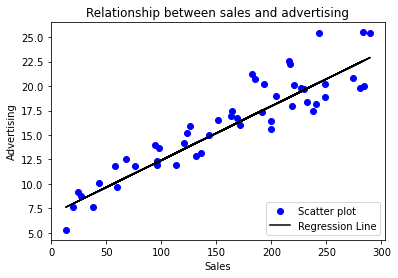

In [22]:
#Regression line
plt.scatter(X_test,y_test,color = 'blue', label='Scatter plot')
plt.plot(X_test,y_pred,color ='black', label='Regression Line')
plt.title('Relationship between sales and advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Residual error ')

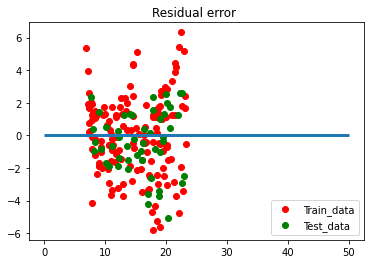

In [23]:
#Residual Analysis
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train , color = 'red',label= 'Train_data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test , color = 'green',label= 'Test_data')
plt.hlines(xmin=0,xmax=50,y =0 ,linewidth=3)
plt.legend(loc=4)
plt.title('Residual error ')

In [24]:
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.8017499848513653
0.8373481951062306


In [25]:
import flask
flask.__version__

'1.1.2'

In [26]:
import pickle

In [28]:
pickle.dump(lm,open('LinearRegression.pkl','wb+'))